In this notebook, I am plotting the adiabat energies of individual trajectories with different couplings and coulomb barriers. We want to use a paramter group that keeps the ground state as the ground state for the majority of the simulation, and gives excited-state populations that will give non-negligible surface populations in the FSSH runs.

Here, the coulomb barriers are non-zero, so the ground state should have significant interfacial CT-character.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sample_array(array, step):

    sampled_array = []
    for row in range(0, len(array), step):

        sampled_array.append(array[row])

    sampled_array = np.array(sampled_array)
    return sampled_array

'e' characters refer to dielectric constant magnitudes, they are large here because we need very weak coulomb barriers to get significant excited-state populations. 'j' refers to the magnitude of the AOM scaling constants in the X-SH input files. These all refer to BOMD runs, 1ps long.

'e25_j0p75' is the paramter-set we chose to run for 40ps as the NVE run, as this gave a consistent ground state as reasonable excited-state boltzmann populations.

In [3]:
simulation_time = np.arange(0,10001)
abridged_simulation_time = np.arange(0,1010,10)

e30_j0p75 = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-0')
e30_j0p75 = sample_array(e30_j0p75, 100)

e20_j0p75 = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-1')
e20_j0p75 = sample_array(e20_j0p75, 100)

e25_j0p75 = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-2')
#e25_j0p75 = sample_array(e25_j0p75, 100)

e30_j0p1 = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-3')
e30_j0p1 = sample_array(e30_j0p1, 100)

e25_j0p1 = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-4')
e25_j0p1 = sample_array(e25_j0p1, 100)

number_adiabats = 3

Plotting the adiabat energies of the 40ps BOMD run, used as an NVE run.

Text(0, 0.5, 'Energy /Hartrees')

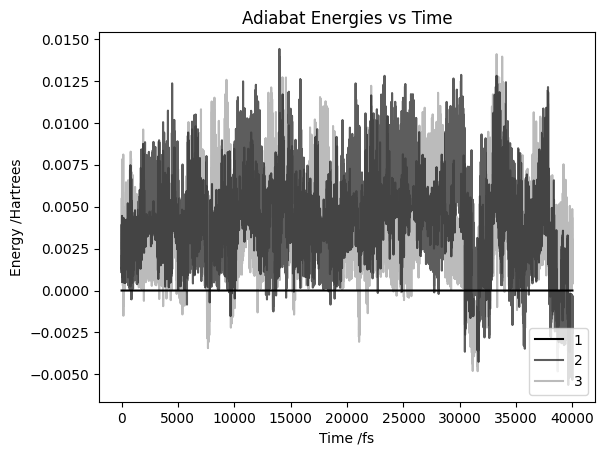

In [4]:
NVE_run = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/energy-array-NVE.txt')

NVE_simulation_time = np.arange(0, len(NVE_run))*0.1

for index in range(0, number_adiabats):

    shading = 1 - 1.1*(index/number_adiabats)
    relative_energies = NVE_run[:,index] - NVE_run[:,0]

    plt.plot(NVE_simulation_time, relative_energies, color = 'k', alpha = shading, label = f'{index+1}')

plt.legend(loc = 'lower right')
plt.title('Adiabat Energies vs Time')
plt.xlabel('Time /fs')
plt.ylabel('Energy /Hartrees')

Here, I calculate the percentage of time each (t=0) adiabat spends as the adiabat that is nth in energy. These should all sum to one.

In [5]:
state_order_counter = np.zeros(12)
#ground_state_crossings = []

#the commented out code just gives the timesteps at which the non (t=0) ground-state adiabats
#are now lowest in energy; this is just used to perhaps sample geometries for the NVE trajectories
#where the ground-state at the beginning pf these trajectories is the same as the ground state with
#interfacial CT-character

for step, element in enumerate(NVE_run[200000:]):

    chosen_E = np.sort(element)[0] #the index here chooses the nth state for which you want the different fractions
    chosen_index = np.where(element == chosen_E)[0][0]

    #if minimum_index != 0:
     #   ground_state_crossings.append(step)

    state_order_counter[chosen_index] = state_order_counter[chosen_index] + 1

state_order_counter = state_order_counter/np.sum(state_order_counter)
print(state_order_counter)
print(np.sum(state_order_counter))

[0.72936135 0.05761971 0.0406248  0.00861996 0.05267974 0.01039995
 0.03032485 0.06874466 0.00162499 0.         0.         0.        ]
1.0


Text(0, 0.5, 'Energy /Hartrees')

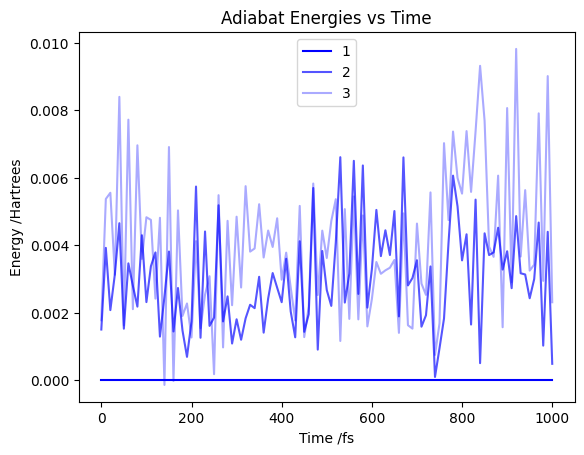

In [6]:
for index in range(0, number_adiabats):

    shading = 1 - index/number_adiabats
    relative_energies = e20_j0p75[:,index] - e20_j0p75[:,0]

    plt.plot(abridged_simulation_time, relative_energies, color = 'b', alpha = shading, label = f'{index+1}')

plt.legend()
plt.title('Adiabat Energies vs Time')
plt.xlabel('Time /fs')
plt.ylabel('Energy /Hartrees')

Text(0, 0.5, 'Energy /Hartrees')

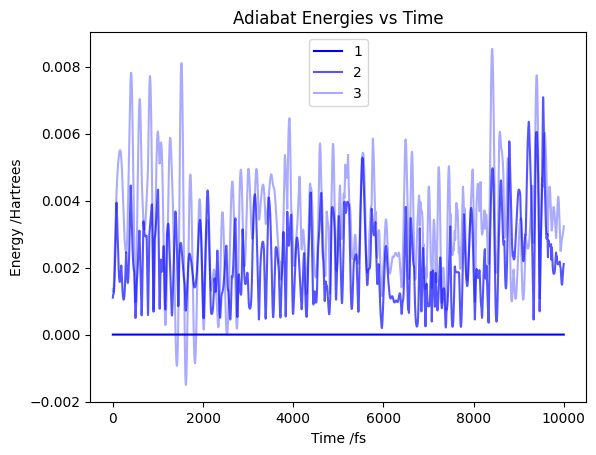

In [7]:
for index in range(0, number_adiabats):

    shading = 1 - index/number_adiabats
    relative_energies = e25_j0p75[:,index] - e25_j0p75[:,0]

    plt.plot(simulation_time, relative_energies, color = 'b', alpha = shading, label = f'{index+1}')

plt.legend()
plt.title('Adiabat Energies vs Time')
plt.xlabel('Time /fs')
plt.ylabel('Energy /Hartrees')

Text(0.5, 1.0, 'Interfacial CT-diabat Population')

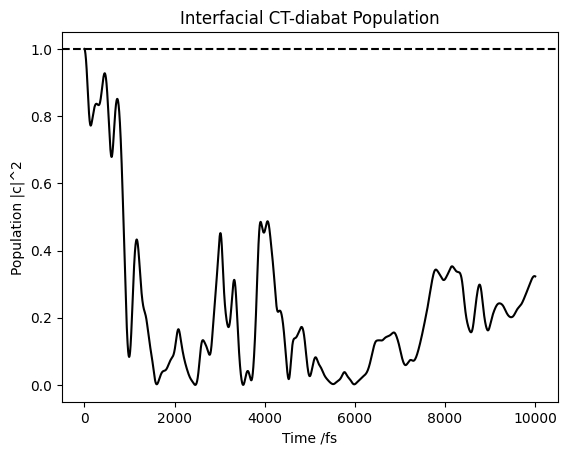

In [8]:
diabatic_pop_nodecoherence = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/diabatic-pop-nodecoherence.txt')
diabatic_pop_decoherence = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/detailed_balance/single_traj_arrays/diabatic-pop-decoherence.txt')

plt.plot(simulation_time, diabatic_pop_nodecoherence[:,3], color = 'k')
#plt.plot(simulation_time[:4001], diabatic_pop_decoherence[:,3], color = 'b')
plt.axhline(1, color = 'k', linestyle = '--')
plt.xlabel('Time /fs')
plt.ylabel('Population |c|^2')
plt.title('Interfacial CT-diabat Population')